In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import ssl
import os

In [13]:
# ✅ Fix SSL certificate verification issue
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
# ✅ Updated data path (no train/val/test directories; direct class folders under 'Body Parts')
data_dir = 'Body Parts/Nails'  # Example: 'Body Parts/Eye', 'Body Parts/Face', etc.


In [15]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [16]:
# ✅ Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ Split data into 80% train and 20% validation
)


In [17]:
# ✅ Generator function
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 560 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [18]:
# ✅ Debugging: Verify classes
print("Classes found:", train_generator.class_indices)
num_classes = train_generator.num_classes
print(f"Number of classes detected: {num_classes}")

Classes found: {"beau's line": 0, 'black line': 1, 'clubbing': 2, "muehrck-e's lines": 3, 'onycholysis': 4, "terry's nail": 5, 'white spot': 6}
Number of classes detected: 7


In [19]:
# ✅ Build VGG16 model
def build_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [20]:
# ✅ Callbacks to save the model
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath=f'{model_name}_saved_model_Nails', save_format='tf', monitor='val_loss', save_best_only=True)  # ✅ TensorFlow SavedModel format
    ]


In [21]:
# ✅ Training function
def train_model(model, model_name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks=get_callbacks(model_name)
    )

    # ✅ Save final model in TensorFlow SavedModel format
    model_save_path = f'{model_name}_final_saved_model'
    model.save(model_save_path, save_format='tf')
    print(f"✅ Final model saved at: {model_save_path}")
    return history

In [22]:
# ✅ Build and train VGG16 model
print("Building and training VGG16 model...")
model = build_vgg16_model(num_classes)
history = train_model(model, 'BodyParts_VGG16')

Building and training VGG16 model...
Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 2.1032 - accuracy: 0.1411 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 400s 23s/step - loss: 2.1032 - accuracy: 0.1411 - val_loss: 1.9340 - val_accuracy: 0.1429
Epoch 2/20
18/18 [==============================] - ETA: 0s - loss: 1.9827 - accuracy: 0.1750 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 347s 19s/step - loss: 1.9827 - accuracy: 0.1750 - val_loss: 1.9138 - val_accuracy: 0.2143
Epoch 3/20
18/18 [==============================] - ETA: 0s - loss: 1.9342 - accuracy: 0.1714 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 273s 15s/step - loss: 1.9342 - accuracy: 0.1714 - val_loss: 1.8990 - val_accuracy: 0.2429
Epoch 4/20
18/18 [==============================] - 266s 15s/step - loss: 1.9094 - accuracy: 0.2179 - val_loss: 1.9077 - val_accuracy: 0.1929
Epoch 5/20
18/18 [==============================] - ETA: 0s - loss: 1.8598 - accuracy: 0.2196 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 273s 16s/step - loss: 1.8598 - accuracy: 0.2196 - val_loss: 1.8826 - val_accuracy: 0.2786
Epoch 6/20
18/18 [==============================] - ETA: 0s - loss: 1.8468 - accuracy: 0.2839 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 283s 16s/step - loss: 1.8468 - accuracy: 0.2839 - val_loss: 1.8678 - val_accuracy: 0.2714
Epoch 7/20
18/18 [==============================] - ETA: 0s - loss: 1.8141 - accuracy: 0.2696 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 241s 13s/step - loss: 1.8141 - accuracy: 0.2696 - val_loss: 1.8466 - val_accuracy: 0.2286
Epoch 8/20
18/18 [==============================] - 193s 11s/step - loss: 1.7991 - accuracy: 0.3036 - val_loss: 1.8483 - val_accuracy: 0.3214
Epoch 9/20
18/18 [==============================] - ETA: 0s - loss: 1.7882 - accuracy: 0.2857INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 192s 11s/step - loss: 1.7882 - accuracy: 0.2857 - val_loss: 1.8270 - val_accuracy: 0.3000
Epoch 10/20
18/18 [==============================] - ETA: 0s - loss: 1.7759 - accuracy: 0.3143INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 145s 8s/step - loss: 1.7759 - accuracy: 0.3143 - val_loss: 1.8106 - val_accuracy: 0.3071
Epoch 11/20
18/18 [==============================] - 88s 5s/step - loss: 1.7856 - accuracy: 0.3054 - val_loss: 1.8174 - val_accuracy: 0.3143
Epoch 12/20
18/18 [==============================] - ETA: 0s - loss: 1.7149 - accuracy: 0.3429INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Nails/assets


18/18 [==============================] - 88s 5s/step - loss: 1.7149 - accuracy: 0.3429 - val_loss: 1.7687 - val_accuracy: 0.2857
Epoch 13/20
18/18 [==============================] - 86s 5s/step - loss: 1.7453 - accuracy: 0.3196 - val_loss: 1.7976 - val_accuracy: 0.3071
Epoch 14/20
18/18 [==============================] - 86s 5s/step - loss: 1.7358 - accuracy: 0.3125 - val_loss: 1.7919 - val_accuracy: 0.3000
Epoch 15/20
18/18 [==============================] - 86s 5s/step - loss: 1.7105 - accuracy: 0.3500 - val_loss: 1.7829 - val_accuracy: 0.3429
Epoch 16/20
18/18 [==============================] - 87s 5s/step - loss: 1.7004 - accuracy: 0.3500 - val_loss: 1.7780 - val_accuracy: 0.3143
Epoch 17/20
18/18 [==============================] - 86s 5s/step - loss: 1.6616 - accuracy: 0.3607 - val_loss: 1.7895 - val_accuracy: 0.2929
INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


✅ Final model saved at: BodyParts_VGG16_final_saved_model


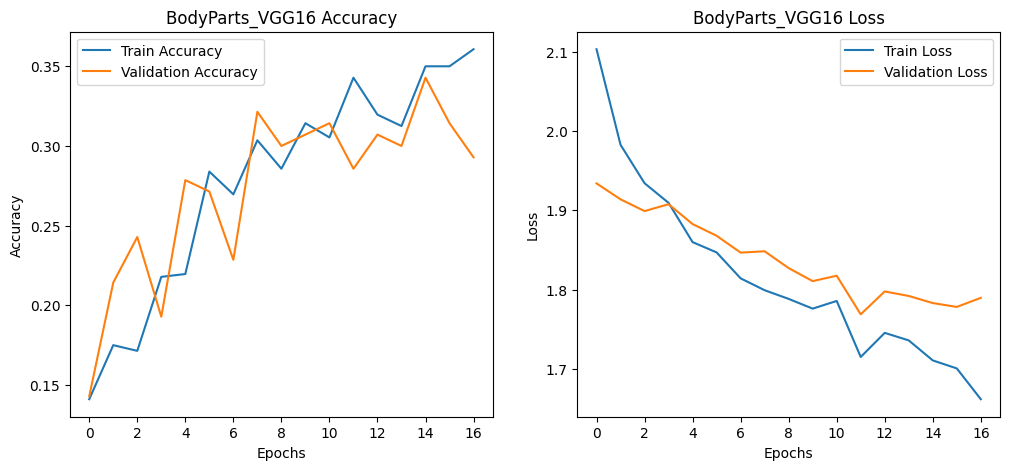

In [23]:
# ✅ Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, 'BodyParts_VGG16')


In [24]:
# Save final models in TensorFlow SavedModel format
model.save('Nails_model')  

INFO:tensorflow:Assets written to: Nails_model/assets


INFO:tensorflow:Assets written to: Nails_model/assets
